# Micro example of the proyect for upwork
First of all a cordial greeting, the purpose of this notebook is to demonstrate with a small file, that represents at least 1% of the information handled, and the main methods used to process and present the results.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Importing the database
the file to read is a csv file with 4 columns and more of 5600 rows. Inside is the info of two of the many methods of only one laboratory of all the laboratories.

The original database consists of 17 columns, less that half of the were relevant to the study carried out, due to the particularity of the infomation contained.

A query to the database generated the csv file below: One laboaratory, two methods and their submethods if they have them, more that a decade of data, the priority of each with their status. The rest was omitted to comply with te company's internal laws and regulations.

In [2]:
df = pd.read_csv('upwork.csv', sep=';', index_col='N.')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5648 entries, 1 to 5648
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Prioridad  5648 non-null   object
 1   Fecha      5648 non-null   object
 2   Ensayo     5648 non-null   object
 3   Estatus    5648 non-null   object
dtypes: object(4)
memory usage: 220.6+ KB


### 1.1 General study of the methods over time.
The information was grouped using filters to carry out a general study of the behavior of the methods over time.
1. The methods to be studied were grouped as the main category.
2. Second the Priority of each one, this is divided into three categories.
3. Third, the Status of each assay which is also divided into three categories.
4. And finally the count of each assay, using the date as reference for this example.

In [3]:
data = df.groupby(['Ensayo', 'Prioridad', 'Estatus'])[['Fecha']].count()
data

Fecha
Ensayo Prioridad Estatus               
IT-515 green     pipeta_check        71
                 pipeta_estrella    107
                 pipeta_retirado      3
       red       pipeta_check        14
                 pipeta_estrella     11
                 pipeta_retirado      1
       yellow    pipeta_check       121
                 pipeta_estrella    514
                 pipeta_retirado     11
IT-532 green     pipeta_check       374
                 pipeta_estrella    500
                 pipeta_retirado    145
       red       pipeta_check       368
                 pipeta_estrella     48
                 pipeta_retirado     40
       yellow    pipeta_check       923
                 pipeta_estrella   2235
                 pipeta_retirado    147
IT-655 red       pipeta_check        15

### 1.2 Database cleanup.
The assay STQA-IT-655 is discarded, because it is a recent submethod and applied under specials conditions.

In [4]:
data.reset_index(inplace=True)
data = data.loc[(data['Ensayo'] != 'IT-655')]
data

,Ensayo,Prioridad,Estatus,Fecha
0,IT-515,green,pipeta_check,71
1,IT-515,green,pipeta_estrella,107
2,IT-515,green,pipeta_retirado,3
3,IT-515,red,pipeta_check,14
4,IT-515,red,pipeta_estrella,11
5,IT-515,red,pipeta_retirado,1
6,IT-515,yellow,pipeta_check,121
7,IT-515,yellow,pipeta_estrella,514
8,IT-515,yellow,pipeta_retirado,11
9,IT-532,green,pipeta_check,374


### 1.3 Transformation of the data in the columns for the report.
1. The columns are renamed:
    1. Ensayo to Method.
    2. Prioridad to Priority.
    3. Estatus to Fulfilment.
    4. Fecha to Demand.
2. In the Priority column we change the values:
    1. red a Urgent.
    2. yellow a Prompt.
    3. green a Normal
3. In the fulfilment column we change the values:
    1. pipeta_estrella a Absolute.
    2. pipeta_check a Partial.
    3. pipeta_retirado a Withdrawn.

In [5]:
replac = ['pipeta_estrella', 'pipeta_retirado', 
          'pipeta_check', 'red', 'green', 'yellow']
fulfilmen = ['Absolute', 'Withdrawn', 'Partial', 
             'Urgent',  'Normal', 'Prompt']
renam={"Ensayo": "Method", "Prioridad": "Priority", 
       "Estatus":"Fulfilment", "Fecha":"Demand"}
data = data.replace(to_replace=replac, value=fulfilmen)
data = data.rename(columns=renam)
data

,Method,Priority,Fulfilment,Demand
0,IT-515,Normal,Partial,71
1,IT-515,Normal,Absolute,107
2,IT-515,Normal,Withdrawn,3
3,IT-515,Urgent,Partial,14
4,IT-515,Urgent,Absolute,11
5,IT-515,Urgent,Withdrawn,1
6,IT-515,Prompt,Partial,121
7,IT-515,Prompt,Absolute,514
8,IT-515,Prompt,Withdrawn,11
9,IT-532,Normal,Partial,374


### 1.4 Database molding.
1. The Priority column must be ordened in Urgent, Prompt, Normal.
2. The Fulfilment column must be ordened in Absolute, Partial, Withdrawn.

**Note** we use Categorical method of pandas because we dont always can use sort alphabetic.

In [6]:
priority = ['Urgent', 'Prompt', 'Normal']
data['sort1'] = pd.Categorical(data['Priority'], priority)

fulfilment = ['Absolute', 'Partial', 'Withdrawn']
data['sort2'] = pd.Categorical(data['Fulfilment'], fulfilment)

data.sort_values(['Method', 'sort1', 'sort2'], inplace=True)
data.reset_index(drop=True, inplace=True)
data.drop(columns=['sort1', 'sort2'], inplace=True)
data

,Method,Priority,Fulfilment,Demand
0,IT-515,Urgent,Absolute,11
1,IT-515,Urgent,Partial,14
2,IT-515,Urgent,Withdrawn,1
3,IT-515,Prompt,Absolute,514
4,IT-515,Prompt,Partial,121
5,IT-515,Prompt,Withdrawn,11
6,IT-515,Normal,Absolute,107
7,IT-515,Normal,Partial,71
8,IT-515,Normal,Withdrawn,3
9,IT-532,Urgent,Absolute,48


### 1.5 Determing percentage of demand for each method.
The percentage of demand for each method is determined and included in the database as an additional column name "Demand_pct".

In [7]:
method = list(data['Method'].value_counts().index)
data['%Demand'] = 0

for i in range(len(method)):
    mask = data['Method'] == method[i]
    data[i] = ((data.loc[mask]['Demand']*100)/
                           data.loc[mask]['Demand'].values.sum())
    data[i] = data[i].fillna(value=0)
    data['%Demand'] = data['%Demand'] + data[i]
    data = data.drop([i], axis=1)
data

,Method,Priority,Fulfilment,Demand,%Demand
0,IT-515,Urgent,Absolute,11,1.289566
1,IT-515,Urgent,Partial,14,1.641266
2,IT-515,Urgent,Withdrawn,1,0.117233
3,IT-515,Prompt,Absolute,514,60.257913
4,IT-515,Prompt,Partial,121,14.185229
5,IT-515,Prompt,Withdrawn,11,1.289566
6,IT-515,Normal,Absolute,107,12.543962
7,IT-515,Normal,Partial,71,8.323564
8,IT-515,Normal,Withdrawn,3,0.351700
9,IT-532,Urgent,Absolute,48,1.004184


### 1.6 Graphing results.
Using the bar plot, and the librery Seaborn and FacetGrid, we maps the dataset onto multiplex axes arrayed in a grid of rows and columns that correspond to the Method, the Priority and Fulfilment of variables.

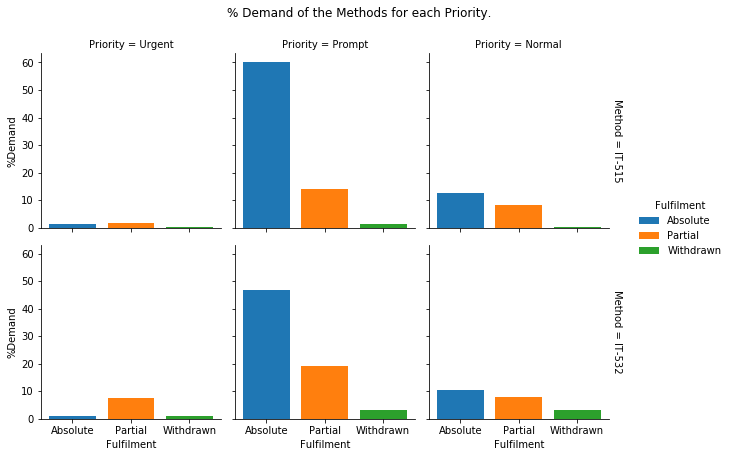

In [8]:
g = sns.FacetGrid(data, col="Priority", col_order=priority, row="Method", 
                  hue="Fulfilment", hue_order=fulfilment, margin_titles=True)

g.fig.suptitle('% Demand of the Methods for each Priority.', x=0.5, y=1.05)
g = g.map(plt.bar, "Fulfilment", "%Demand").add_legend()

### 1.7 Saving the imagen
Last but not least, we save the resulting graphic in an image file.

In [9]:
g.savefig('upwork.png', format='png')

#### Note
for more information check my github folder project https://github.com/josean7link/upwork-project